<a href="https://colab.research.google.com/github/Rekkice/ADA-Informes/blob/main/Informe7_CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de corte de varillas

Entrada: Largo de varillas y arreglo con precios.

Salida: Máximo dinero al cortar las varillas y vender las partes.

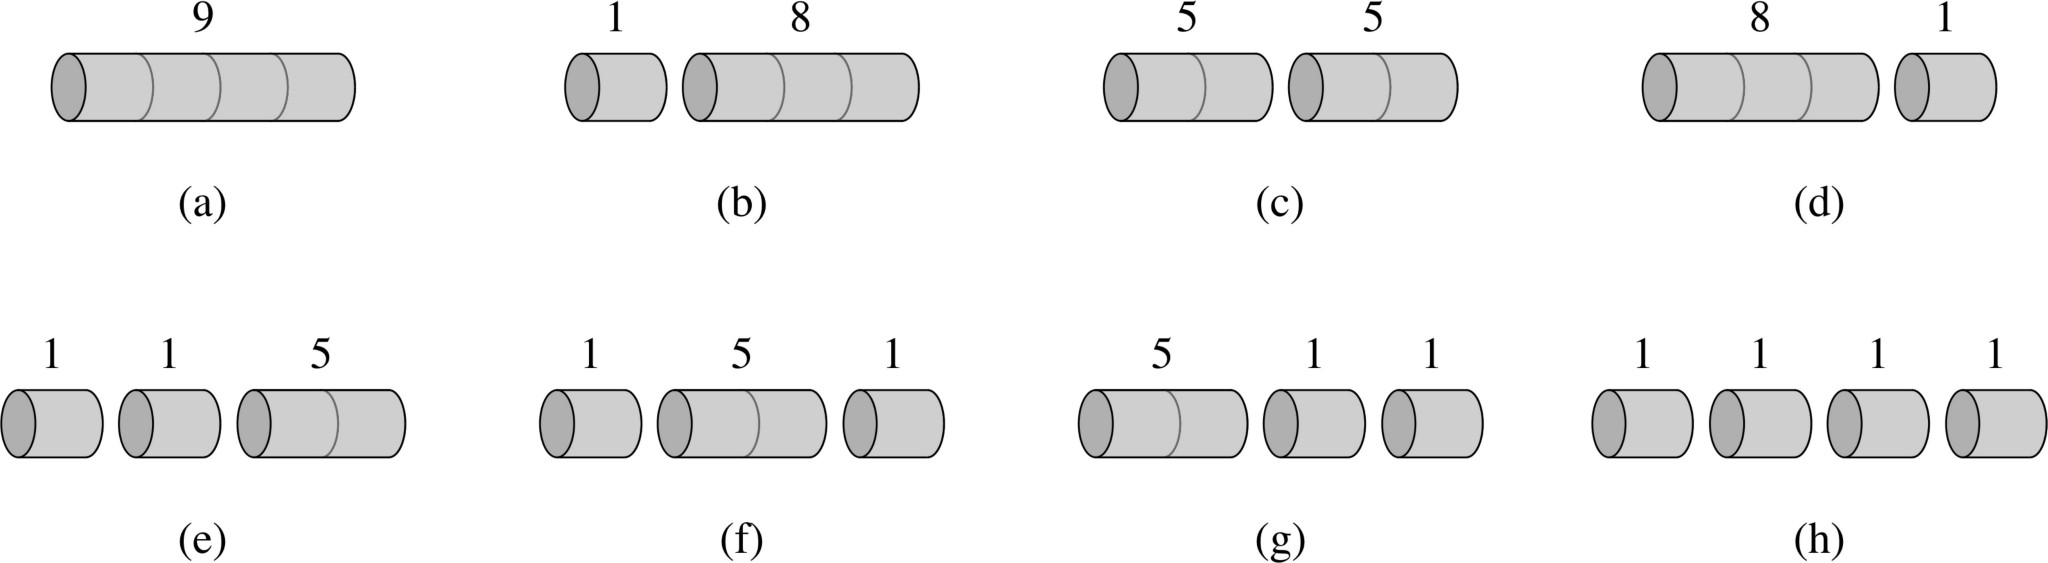

El problema de corte de varillas es un problema de optimización que generalmente se resuelve utilizando programación dinámica, pero también puede ser resuelto con recursión. Su solución es  el mayor precio que se puede obtee cortar la varilla en partes y luego venderlas por separado.

# 2. Corte

# 2.1 Descripción del algoritmo

## Subestructura óptima

El algoritmo usa la siguiente subestructura óptima: 

Para todo i entre 0 y n - 1
corte(n) = max(precio[i] + corte[n - i - 1])

Se compara el valor de la varilla de largo *n* con el valor máximo de la varilla con cortes. Luego, se retorna el mayor valor de esos 2. El valor de cada solución se guarda en un mapa.

## Recursión retorno máximo

Se calcula el precio máximo de la varilla completa, luego se compara con el precio de la varilla si se realiza un corte, y el precio de la solución guardada anterior.

## 2.2 Código

In [32]:
def corteRecursivo(largo, indice, precios, verbose=False, numCortes = 0):
    if indice == 0: return largo * precios[0], numCortes # solución del caso base
    if largo == 0: return 0, 0
    if verbose: print(f"Se llama corteRecursivo() con una varilla de largo {largo} e indice {indice}"); print()

    sinCorte, numCortes1 = corteRecursivo(largo, indice - 1, precios, verbose, numCortes)
    if largo - indice - 1 < 0:
        return sinCorte, numCortes1
    resultadoCorte, numCortes2 = corteRecursivo(largo - indice - 1, indice, precios, verbose, numCortes)
    resultadoCorte = precios[indice] + resultadoCorte
    if sinCorte < resultadoCorte:
        if verbose: print(f"El valor de la varilla resultadoCorte es mayor, se retorna la varilla cortada")
        return resultadoCorte, numCortes2 + 1
    else:
        if verbose: print(f"El valor de la varilla sinCorte es mayor, se retorna la varilla sin cortar")
        return sinCorte, numCortes1

def corte(largo, precios, verbose=False, mapa = {}):
    if largo in mapa: return mapa[largo] # si la solución ya fue encontrada anteriormente, se retorna
    if largo == 0: return (0, [])        # solución del caso base
    if verbose and ("inicial" not in mapa):
        mapa["inicial"] = largo

    if verbose: print(f"Se llama corte() con una varilla de largo {largo}"); print()

    for i in range(1, largo + 1):
        resultadoCorte, cortes = corte(largo - i, precios, verbose, mapa)
        maxV = max(precios[largo - 1], precios[i - 1] + resultadoCorte)
        if (largo not in mapa) or (largo in mapa and maxV > mapa[largo][0]): # decide si se debe guardar el valor en el mapa
            if maxV == precios[largo - 1]:                                   # obtiene los cortes realizados para llegar a la solución
                cortes = [largo]
            else:
                cortes = cortes.copy()                                       # copia el arreglo para no modificar el que ya existe en el mapa
                cortes.append(i)                                             # agrega la parte de la varilla que fue cortada al final de la lista
            mapa[largo] = (maxV, cortes)
            
    if verbose:
        print(f"Varilla de largo {largo} resuelta, solución = {mapa[largo][0]} con cortes de largo {mapa[largo][1]}")
        if largo == mapa["inicial"]:
            print()
            mapa.pop("inicial")
            print(f"mapa de subproblemas = {mapa}")

    return mapa[largo]

## 2.3 Ejecución paso a paso

In [34]:
precios = [1, 5, 8, 9, 10, 17, 17, 20]
corte(8, precios, True, {})
print()

Se llama corte() con una varilla de largo 8

Se llama corte() con una varilla de largo 7

Se llama corte() con una varilla de largo 6

Se llama corte() con una varilla de largo 5

Se llama corte() con una varilla de largo 4

Se llama corte() con una varilla de largo 3

Se llama corte() con una varilla de largo 2

Se llama corte() con una varilla de largo 1

Varilla de largo 1 resuelta, solución = 1 con cortes de largo [1]
Varilla de largo 2 resuelta, solución = 5 con cortes de largo [2]
Varilla de largo 3 resuelta, solución = 8 con cortes de largo [3]
Varilla de largo 4 resuelta, solución = 10 con cortes de largo [2, 2]
Varilla de largo 5 resuelta, solución = 13 con cortes de largo [3, 2]
Varilla de largo 6 resuelta, solución = 17 con cortes de largo [6]
Varilla de largo 7 resuelta, solución = 18 con cortes de largo [6, 1]
Varilla de largo 8 resuelta, solución = 22 con cortes de largo [6, 2]

mapa de subproblemas = {1: (1, [1]), 2: (5, [2]), 3: (8, [3]), 4: (10, [2, 2]), 5: (13, [3, 2]

In [33]:
precios = [1, 5, 8, 9, 10, 17, 17, 20]
corteRecursivo(8, 8-1, precios, True)

Se llama corteRecursivo() con una varilla de largo 8 e indice 7

Se llama corteRecursivo() con una varilla de largo 8 e indice 6

Se llama corteRecursivo() con una varilla de largo 8 e indice 5

Se llama corteRecursivo() con una varilla de largo 8 e indice 4

Se llama corteRecursivo() con una varilla de largo 8 e indice 3

Se llama corteRecursivo() con una varilla de largo 8 e indice 2

Se llama corteRecursivo() con una varilla de largo 8 e indice 1

Se llama corteRecursivo() con una varilla de largo 6 e indice 1

Se llama corteRecursivo() con una varilla de largo 4 e indice 1

Se llama corteRecursivo() con una varilla de largo 2 e indice 1

El valor de la varilla resultadoCorte es mayor, se retorna la varilla cortada
El valor de la varilla resultadoCorte es mayor, se retorna la varilla cortada
El valor de la varilla resultadoCorte es mayor, se retorna la varilla cortada
El valor de la varilla resultadoCorte es mayor, se retorna la varilla cortada
Se llama corteRecursivo() con una vari

(22, 2)

#3. Tiempo de ejecución

La siguiente función nos entrega que la cantidad de subproblemas que se deben resolver para una entrada de $n$ datos.

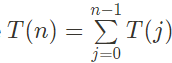

Esta ecuación nos entrega que se necesita resolver $2^n$ subproblemas para una entrada de datos de tamaño $n$.

El tiempo de ejecucción para el algoritmo completo es de $O(n^2)$ debido a la necesidad de tener dos ciclos $for$ anidados para poder utilizar el metodo $bottom-up$ del algoritmo. El tiempo de ejecucción de los subproblemas, al únicamente estarse recorriendo y comparando valores tienen el valor de $O(n)$. Por último, la complejidad espacial del algoritmo es de $O(n)$, debido a que debe almacenar $n$ datos extras que son los valores máximos de cada longitud.

#4. Correctitud

Caso base:
Cuando n = 0, ya se encuentra el valor máximo del beneficio posible, ya que este valor siempre es el mismo (0)

Mantención: Luego de una n-ésima iteración, dentro del segundo for el algoritmo verifica y almacena en caso de que el valor sea mayor al máximo anterior, por lo que luego de la iteración, puede asegurarse que se guarda el máximo precio hasta el momento.

#5. Experimentos

A continuacion se realizará una serie de experimentos para comparar el rendimiento de la implementación **dinámica bottom up** y la implementación **recursiva**.

##5.1. Tiempo de ejecución

En este experimento se compara el tiempo de ejecución de la implentación **bottom up** y la **recursiva**, para esto el algortimo va a crear una lista de precios aleatoria y va ejecutar ambas implementaciones $10$ veces.

* Tiempo de ejecución de **bottom up** (la gráfica azul)
* Tiempo de ejecución de **recursiva** (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,15]$

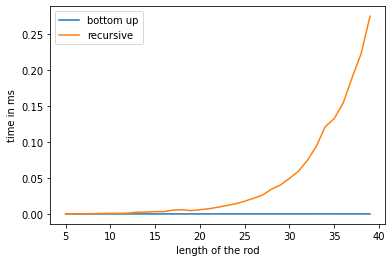

In [47]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,40):

  p = cutrod_instance_generator(n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import corte", stmt=f"corte({n},{p})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import corteRecursivo", stmt=f"corteRecursivo({n},{n-1},{p})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["bottom up", "recursive"])

plt.xlabel('length of the rod')
plt.ylabel('time in ms')
plt.show()

## Análisis

El tiempo del algoritmo recursivo es exponencial, mientras que el bottom up es linear. Esto se debe a que el algoritmo recursivo debe resolver el mismo subproblema varias veces, lo que genera una mayor cantidad de trabajo. El bottom up no presenta este problema, puesto que las soluciones se encuentran una vez y luego quedan guardadas.

##5.2. Cantidad de sub-problemas

A continuación se experimentará con la cantidad de sub-problemas que debe resolver la implementación **bottom-up** a lo largo de su ejecución.

* Cantidad de sub-problemas resueltos (eje $Y$)
* Longitud de la varilla (eje $X$)

para un problema de tamaño $[5,50]$

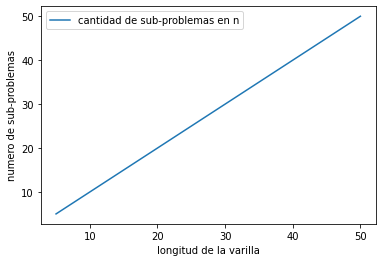

In [46]:
import matplotlib.pyplot as plt

x=[n for n in range(5,51)] 
y=[]

for n in range(5,51):
  p = cutrod_instance_generator(n)
  mapa = {}
  corte(n, p, False, mapa)
  y.append(len(mapa))

plt.plot(x,y)
plt.legend(["cantidad de sub-problemas en n"])

plt.xlabel('longitud de la varilla')
plt.ylabel('numero de sub-problemas')
plt.show()

## Análisis
La cantidad de subproblemas que tiene una varilla de largo *n* es igual al largo *n*, porque un subproblema en este caso está definido por el valor máximo que se puede obtener de una vara de largo *m*, con *m* siendo todos los valores entre 1 y *n*. Como el algoritmo utiliza el acercamiento bottom-up, es necesario resolver todos los subproblemas menores al largo que se busca para encontrar la solución.